In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv("train.csv")
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
X = dataset[["LotArea","FullBath","HalfBath","BedroomAbvGr"]]
y = dataset[["SalePrice"]]/100000  # Scaling y values because original values are too large
print(X)

      LotArea  FullBath  HalfBath  BedroomAbvGr
0        8450         2         1             3
1        9600         2         0             3
2       11250         2         1             3
3        9550         1         0             3
4       14260         2         1             4
...       ...       ...       ...           ...
1455     7917         2         1             3
1456    13175         2         0             3
1457     9042         2         0             4
1458     9717         1         0             2
1459     9937         1         1             3

[1460 rows x 4 columns]


In [ ]:
print(y)

      SalePrice
0       2.08500
1       1.81500
2       2.23500
3       1.40000
4       2.50000
...         ...
1455    1.75000
1456    2.10000
1457    2.66500
1458    1.42125
1459    1.47500

[1460 rows x 1 columns]


In [ ]:
X_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
print("Total X : ", X.shape, ", Y :", y.shape, "\n")
print("X-Train : ", X_train.shape, ", x-test :", x_test.shape)
print("Y-Train : ", y_train.shape, ", y-test :", y_test.shape)

Total X :  (1460, 4) , Y : (1460, 1) 

X-Train :  (1021, 4) , x-test : (439, 4)
Y-Train :  (1021, 1) , y-test : (439, 1)


In [ ]:
regr = LinearRegression().fit(X_train, y_train)
y_test_pred = regr.predict(x_test)  # Predicting the values

print(y_test_pred)

[[1.51227244]
 [2.17952855]
 [1.39434195]
 [2.01128751]
 [2.30303397]
 [1.31861086]
 [2.32196674]
 [2.17477619]
 [1.14296669]
 [2.3062739 ]
 [2.02895319]
 [1.5520204 ]
 [2.32176764]
 [1.80487306]
 [1.48259828]
 [3.00789203]
 [2.38109998]
 [1.41062191]
 [1.5187885 ]
 [2.30442776]
 [1.97157559]
 [1.12052249]
 [1.53815568]
 [1.72534767]
 [1.24983007]
 [1.28711649]
 [2.29724183]
 [2.05809454]
 [1.53303333]
 [1.98151266]
 [2.52158336]
 [2.05223   ]
 [1.9887347 ]
 [2.06231188]
 [2.17982606]
 [1.33799606]
 [2.43487557]
 [2.16461393]
 [1.96851674]
 [2.31811141]
 [1.20179223]
 [1.75188259]
 [1.20378325]
 [2.37800485]
 [1.29750591]
 [2.32953261]
 [1.21102332]
 [1.81361544]
 [2.74240891]
 [1.23274351]
 [2.33619347]
 [1.72389284]
 [1.29575027]
 [2.31907071]
 [2.3061653 ]
 [2.26726804]
 [1.99206505]
 [2.28773933]
 [1.51819119]
 [2.097752  ]
 [1.25290718]
 [1.97593781]
 [2.16983485]
 [1.21681537]
 [1.84496493]
 [1.19654318]
 [1.23028197]
 [1.26539629]
 [1.26539629]
 [1.17120295]
 [1.79086353]
 [1.18

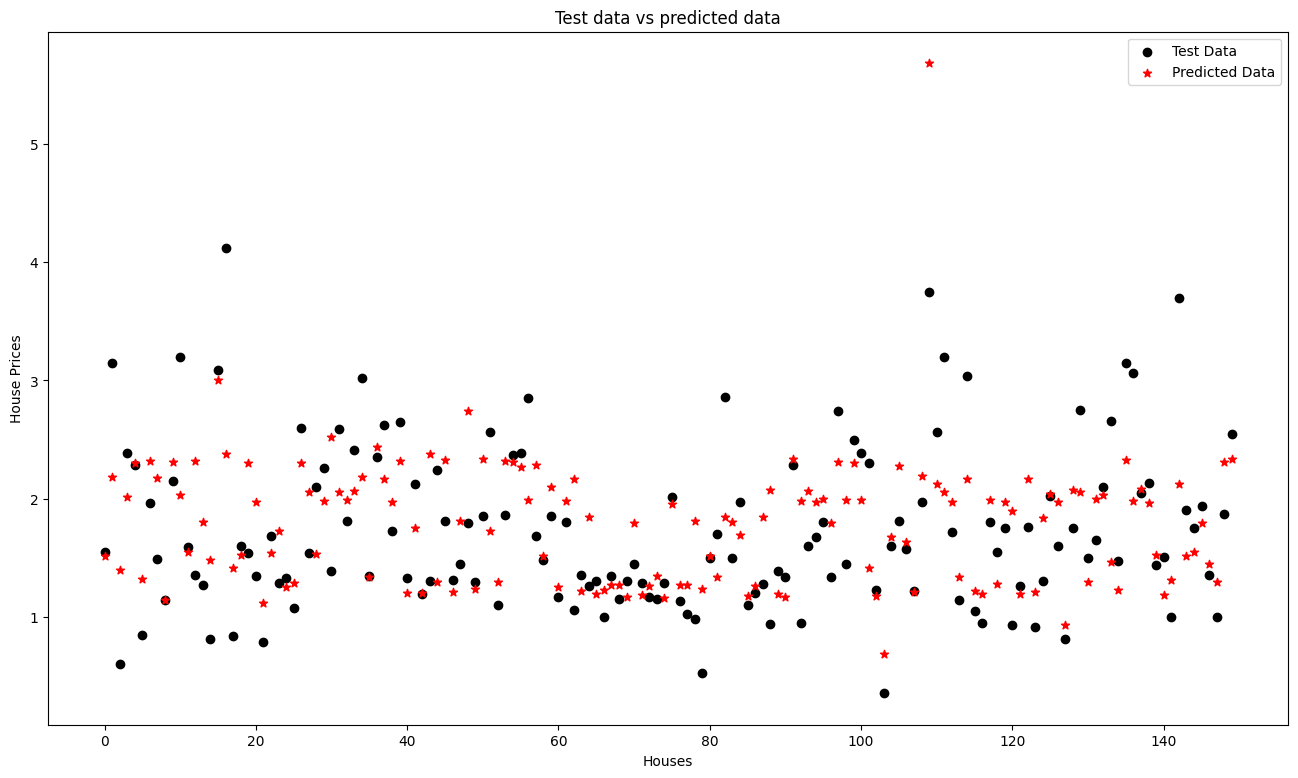

In [ ]:
plt.figure(figsize=(16, 9))

plt.scatter(range(len(y_test[:150])), y_test[:150], color="black", label="Test Data")
plt.scatter(range(len(y_test_pred[:150])), y_test_pred[:150], color="red", marker="*", label="Predicted Data")\

plt.xlabel("Houses")
plt.ylabel("House Prices")
plt.title("Test data vs predicted data")
plt.legend()
plt.show()

In [41]:
ds = pd.read_csv("test.csv")
Xp = ds[["LotArea","FullBath","HalfBath","BedroomAbvGr"]]
id = ds[["Id"]]
predict = regr.predict(Xp)
for i in range(len(predict)):
  print("Predicted price for house ID", id.iloc[i]["Id"], "is", round(predict[i][0]*100000,2))

Predicted price for house ID 1461 is 136715.54
Predicted price for house ID 1462 is 163312.72
Predicted price for house ID 1463 is 238367.02
Predicted price for house ID 1464 is 231394.84
Predicted price for house ID 1465 is 200583.94
Predicted price for house ID 1466 is 231434.66
Predicted price for house ID 1467 is 193291.37
Predicted price for house ID 1468 is 228542.25
Predicted price for house ID 1469 is 168585.31
Predicted price for house ID 1470 is 130883.67
Predicted price for house ID 1471 is 202127.88
Predicted price for house ID 1472 is 153207.41
Predicted price for house ID 1473 is 140530.05
Predicted price for house ID 1474 is 217461.33
Predicted price for house ID 1475 is 119806.37
Predicted price for house ID 1476 is 236607.68
Predicted price for house ID 1477 is 202165.88
Predicted price for house ID 1478 is 199698.83
Predicted price for house ID 1479 is 204408.49
Predicted price for house ID 1480 is 239217.73
Predicted price for house ID 1481 is 238041.22
Predicted pri